In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
# read and clean training data
train_auto = pd.read_csv("C:/Users/delst/Desktop/data-scientist-technical-test-main/data/auto-insurance-fall-2017/train_auto.csv")
train_auto = train_auto.drop(columns=['INDEX'])
train_auto = train_auto.drop(columns=['TARGET_AMT'])
train_auto = train_auto.replace({'\$':''}, regex = True)
train_auto = train_auto.replace({'\,':''}, regex = True)
train_auto['HOME_VAL'] = train_auto['HOME_VAL'].replace('0',np.nan) #home values with 0 value are considered as nan
train_auto.BLUEBOOK=train_auto['BLUEBOOK'].apply(lambda x: float(x))
train_auto.HOME_VAL=train_auto['HOME_VAL'].apply(lambda x: float(x))
train_auto.INCOME=train_auto['INCOME'].apply(lambda x: float(x))
train_auto.OLDCLAIM=train_auto['OLDCLAIM'].apply(lambda x: float(x))
train_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   KIDSDRIV     8161 non-null   int64  
 2   AGE          8155 non-null   float64
 3   HOMEKIDS     8161 non-null   int64  
 4   YOJ          7707 non-null   float64
 5   INCOME       7716 non-null   float64
 6   PARENT1      8161 non-null   object 
 7   HOME_VAL     5403 non-null   float64
 8   MSTATUS      8161 non-null   object 
 9   SEX          8161 non-null   object 
 10  EDUCATION    8161 non-null   object 
 11  JOB          7635 non-null   object 
 12  TRAVTIME     8161 non-null   int64  
 13  CAR_USE      8161 non-null   object 
 14  BLUEBOOK     8161 non-null   float64
 15  TIF          8161 non-null   int64  
 16  CAR_TYPE     8161 non-null   object 
 17  RED_CAR      8161 non-null   object 
 18  OLDCLAIM     8161 non-null   float64
 19  CLM_FR

### 2758 nans for HOME_VAL, around 400-500 nans for INCOME, YOJ, JOB, and CAR_AGE, and a few of nans for AGE.


In [6]:
# read and clean test data
test_auto = pd.read_csv("C:/Users/delst/Desktop/data-scientist-technical-test-main/data/auto-insurance-fall-2017/test_auto.csv")
test_auto = test_auto.drop(columns=['INDEX'])
test_auto = test_auto.drop(columns=['TARGET_AMT'])
test_auto = test_auto.replace({'\$':''}, regex = True)
test_auto = test_auto.replace({'\,':''}, regex = True)
test_auto['HOME_VAL'] = test_auto['HOME_VAL'].replace('0',np.nan) #home values with 0 value are considered as nan
test_auto.BLUEBOOK=test_auto['BLUEBOOK'].apply(lambda x: float(x))
test_auto.HOME_VAL=test_auto['HOME_VAL'].apply(lambda x: float(x))
test_auto.INCOME=test_auto['INCOME'].apply(lambda x: float(x))
test_auto.OLDCLAIM=test_auto['OLDCLAIM'].apply(lambda x: float(x))
test_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  0 non-null      float64
 1   KIDSDRIV     2141 non-null   int64  
 2   AGE          2140 non-null   float64
 3   HOMEKIDS     2141 non-null   int64  
 4   YOJ          2047 non-null   float64
 5   INCOME       2016 non-null   float64
 6   PARENT1      2141 non-null   object 
 7   HOME_VAL     1416 non-null   float64
 8   MSTATUS      2141 non-null   object 
 9   SEX          2141 non-null   object 
 10  EDUCATION    2141 non-null   object 
 11  JOB          2002 non-null   object 
 12  TRAVTIME     2141 non-null   int64  
 13  CAR_USE      2141 non-null   object 
 14  BLUEBOOK     2141 non-null   float64
 15  TIF          2141 non-null   int64  
 16  CAR_TYPE     2141 non-null   object 
 17  RED_CAR      2141 non-null   object 
 18  OLDCLAIM     2141 non-null   float64
 19  CLM_FR

In [7]:
print(train_auto.nunique()) #number of unique values per column

TARGET_FLAG       2
KIDSDRIV          5
AGE              60
HOMEKIDS          6
YOJ              21
INCOME         6612
PARENT1           2
HOME_VAL       5105
MSTATUS           2
SEX               2
EDUCATION         5
JOB               8
TRAVTIME         97
CAR_USE           2
BLUEBOOK       2789
TIF              23
CAR_TYPE          6
RED_CAR           2
OLDCLAIM       2857
CLM_FREQ          6
REVOKED           2
MVR_PTS          13
CAR_AGE          30
URBANICITY        2
dtype: int64


In [8]:
# rename to 0 or 1
# train_auto
train_auto['KIDSDRIV'].values[train_auto['KIDSDRIV'] > 0] = 1 #more than 1 is 1
train_auto['HOMEKIDS'].values[train_auto['HOMEKIDS'] > 0] = 1 #more than 1 is 1
train_auto['PARENT1'] = train_auto['PARENT1'].replace('Yes',1)
train_auto['PARENT1'] = train_auto['PARENT1'].replace('No',0)
train_auto['MSTATUS'] = train_auto['MSTATUS'].replace('Yes',1)
train_auto['MSTATUS'] = train_auto['MSTATUS'].replace('z_No',0)
train_auto['SEX'] = train_auto['SEX'].replace('M',1)
train_auto['SEX'] = train_auto['SEX'].replace('z_F',0)
train_auto['CAR_USE'] = train_auto['CAR_USE'].replace('Commercial',1)
train_auto['CAR_USE'] = train_auto['CAR_USE'].replace('Private',0)
train_auto['RED_CAR'] = train_auto['RED_CAR'].replace('yes',1)
train_auto['RED_CAR'] = train_auto['RED_CAR'].replace('no',0)
train_auto['CLM_FREQ'].values[train_auto['CLM_FREQ'] > 0] = 1 #more than 1 is 1
train_auto['REVOKED'] = train_auto['REVOKED'].replace('Yes',1)
train_auto['REVOKED'] = train_auto['REVOKED'].replace('No',0)
train_auto['URBANICITY'] = train_auto['URBANICITY'].replace('Highly Urban/ Urban',1)
train_auto['URBANICITY'] = train_auto['URBANICITY'].replace('z_Highly Rural/ Rural',0)

In [9]:
# rename to 0 or 1
# test_auto
test_auto['KIDSDRIV'].values[test_auto['KIDSDRIV'] > 0] = 1 #more than 1 is 1
test_auto['HOMEKIDS'].values[test_auto['HOMEKIDS'] > 0] = 1 #more than 1 is 1
test_auto['PARENT1'] = test_auto['PARENT1'].replace('Yes',1)
test_auto['PARENT1'] = test_auto['PARENT1'].replace('No',0)
test_auto['MSTATUS'] = test_auto['MSTATUS'].replace('Yes',1)
test_auto['MSTATUS'] = test_auto['MSTATUS'].replace('z_No',0)
test_auto['SEX'] = test_auto['SEX'].replace('M',1)
test_auto['SEX'] = test_auto['SEX'].replace('z_F',0)
test_auto['CAR_USE'] = test_auto['CAR_USE'].replace('Commercial',1)
test_auto['CAR_USE'] = test_auto['CAR_USE'].replace('Private',0)
test_auto['RED_CAR'] = test_auto['RED_CAR'].replace('yes',1)
test_auto['RED_CAR'] = test_auto['RED_CAR'].replace('no',0)
test_auto['CLM_FREQ'].values[test_auto['CLM_FREQ'] > 0] = 1 #more than 1 is 1
test_auto['REVOKED'] = test_auto['REVOKED'].replace('Yes',1)
test_auto['REVOKED'] = test_auto['REVOKED'].replace('No',0)
test_auto['URBANICITY'] = test_auto['URBANICITY'].replace('Highly Urban/ Urban',1)
test_auto['URBANICITY'] = test_auto['URBANICITY'].replace('z_Highly Rural/ Rural',0)

Text(0.5, 1.0, 'Ratio of 0 and 1 for the binary variables')

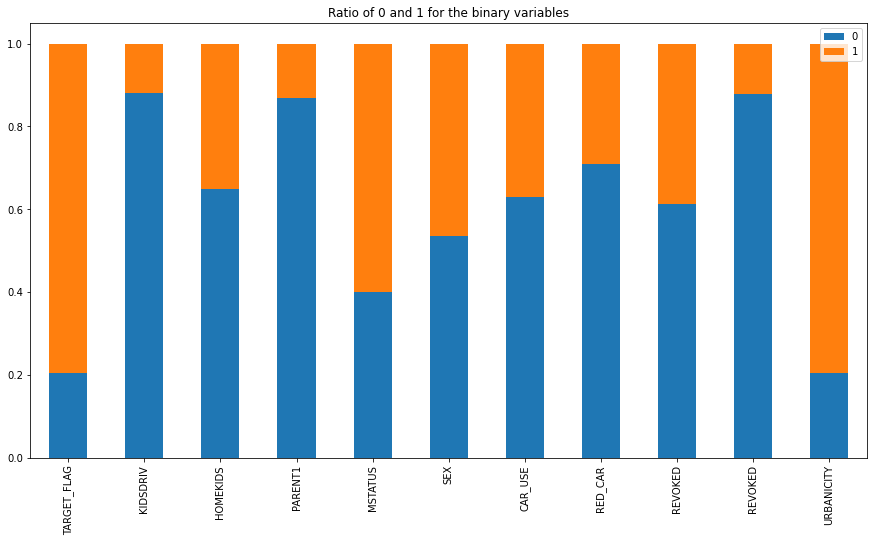

In [10]:
k0 = len(train_auto[train_auto.TARGET_FLAG == 0])/len(train_auto.TARGET_FLAG)
k1 = len(train_auto[train_auto.TARGET_FLAG == 1])/len(train_auto.TARGET_FLAG)
a0 = len(train_auto[train_auto.KIDSDRIV == 0])/len(train_auto.KIDSDRIV)
a1 = len(train_auto[train_auto.KIDSDRIV == 1])/len(train_auto.KIDSDRIV)
b0 = len(train_auto[train_auto.HOMEKIDS == 0])/len(train_auto.HOMEKIDS)
b1 = len(train_auto[train_auto.HOMEKIDS == 1])/len(train_auto.HOMEKIDS)
c0 = len(train_auto[train_auto.PARENT1 == 0])/len(train_auto.PARENT1)
c1 = len(train_auto[train_auto.PARENT1 == 1])/len(train_auto.PARENT1)
d0 = len(train_auto[train_auto.MSTATUS == 0])/len(train_auto.MSTATUS)
d1 = len(train_auto[train_auto.MSTATUS == 1])/len(train_auto.MSTATUS)
e0 = len(train_auto[train_auto.SEX == 0])/len(train_auto.SEX)
e1 = len(train_auto[train_auto.SEX == 1])/len(train_auto.SEX)
f0 = len(train_auto[train_auto.CAR_USE == 0])/len(train_auto.CAR_USE)
f1 = len(train_auto[train_auto.CAR_USE == 1])/len(train_auto.CAR_USE)
g0 = len(train_auto[train_auto.RED_CAR == 0])/len(train_auto.RED_CAR)
g1 = len(train_auto[train_auto.RED_CAR == 1])/len(train_auto.RED_CAR)
h0 = len(train_auto[train_auto.CLM_FREQ == 0])/len(train_auto.CLM_FREQ)
h1 = len(train_auto[train_auto.CLM_FREQ == 1])/len(train_auto.CLM_FREQ)
j0 = len(train_auto[train_auto.REVOKED == 0])/len(train_auto.REVOKED)
j1 = len(train_auto[train_auto.REVOKED == 1])/len(train_auto.REVOKED)
k0 = len(train_auto[train_auto.URBANICITY == 0])/len(train_auto.URBANICITY)
k1 = len(train_auto[train_auto.URBANICITY == 1])/len(train_auto.URBANICITY)

plotdata = pd.DataFrame({
    "0":[k0,a0,b0,c0,d0,e0,f0,g0,h0,j0,k0],
    "1":[k1,a1,b1,c1,d1,e1,f1,g1,h1,j1,k1]},
    index=['TARGET_FLAG', 'KIDSDRIV', 'HOMEKIDS', 'PARENT1', 'MSTATUS', 'SEX', 'CAR_USE', 'RED_CAR', 'REVOKED', 'REVOKED', 'URBANICITY'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Ratio of 0 and 1 for the binary variables")

Text(0.5, 1.0, 'Ratio of the Target_Flag values (0 and 1) for the binary variables with value 1')

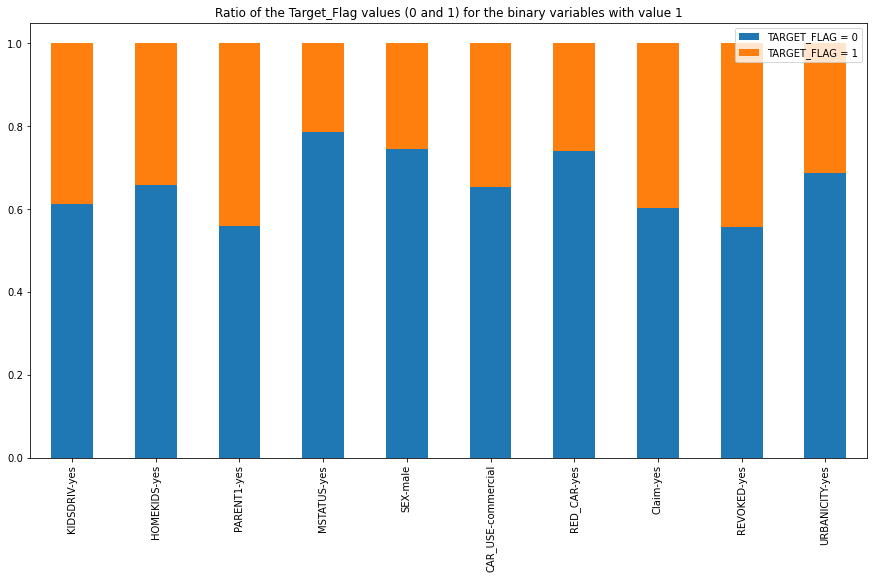

In [11]:
a0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.KIDSDRIV == 1])/len(train_auto[train_auto.KIDSDRIV == 1])
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.KIDSDRIV == 1])/len(train_auto[train_auto.KIDSDRIV == 1])
b0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.HOMEKIDS == 1])/len(train_auto[train_auto.HOMEKIDS == 1])
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.HOMEKIDS == 1])/len(train_auto[train_auto.HOMEKIDS == 1])
c0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.PARENT1 == 1])/len(train_auto[train_auto.PARENT1 == 1])
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.PARENT1 == 1])/len(train_auto[train_auto.PARENT1 == 1])
d0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.MSTATUS == 1])/len(train_auto[train_auto.MSTATUS == 1])
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.MSTATUS == 1])/len(train_auto[train_auto.MSTATUS == 1])
e0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.SEX == 1])/len(train_auto[train_auto.SEX == 1])
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.SEX == 1])/len(train_auto[train_auto.SEX == 1])
f0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_USE == 1])/len(train_auto[train_auto.CAR_USE == 1])
f1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_USE == 1])/len(train_auto[train_auto.CAR_USE == 1])
g0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.RED_CAR == 1])/len(train_auto[train_auto.RED_CAR == 1])
g1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.RED_CAR == 1])/len(train_auto[train_auto.RED_CAR == 1])
h0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CLM_FREQ == 1])/len(train_auto[train_auto.CLM_FREQ == 1])
h1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CLM_FREQ == 1])/len(train_auto[train_auto.CLM_FREQ == 1])
j0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.REVOKED == 1])/len(train_auto[train_auto.REVOKED == 1])
j1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.REVOKED == 1])/len(train_auto[train_auto.REVOKED == 1])
k0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.URBANICITY == 1])/len(train_auto[train_auto.URBANICITY == 1])
k1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.URBANICITY == 1])/len(train_auto[train_auto.URBANICITY == 1])

plotdata = pd.DataFrame({
    "TARGET_FLAG = 0":[a0,b0,c0,d0,e0,f0,g0,h0,j0,k0],
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1,f1,g1,h1,j1,k1]},
    index=['KIDSDRIV-yes', 'HOMEKIDS-yes', 'PARENT1-yes', 'MSTATUS-yes', 'SEX-male', 'CAR_USE-commercial', 'RED_CAR-yes', 'Claim-yes', 'REVOKED-yes', 'URBANICITY-yes'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Ratio of the Target_Flag values (0 and 1) for the binary variables with value 1")

Text(0.5, 1.0, 'Ratio of the Target_Flag values (0 and 1) for the binary variables with value 0')

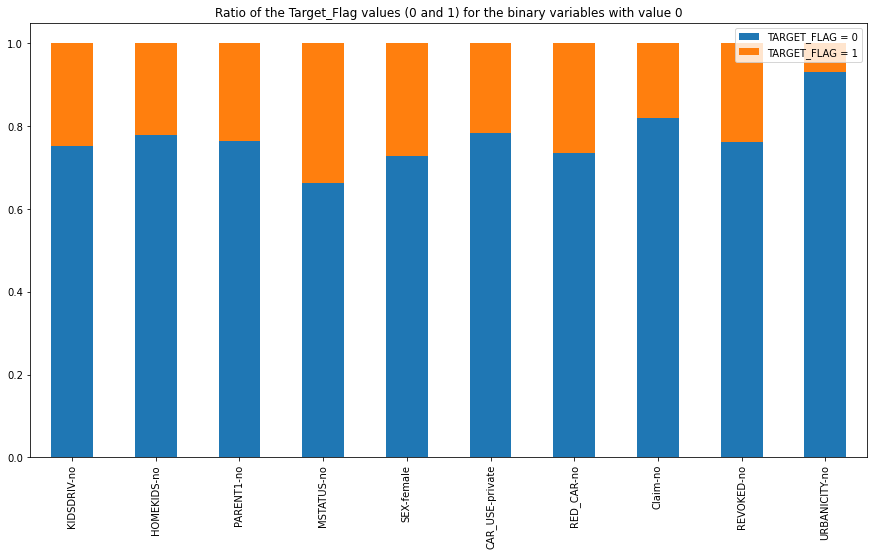

In [12]:
a0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.KIDSDRIV == 0])/len(train_auto[train_auto.KIDSDRIV == 0])
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.KIDSDRIV == 0])/len(train_auto[train_auto.KIDSDRIV == 0])
b0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.HOMEKIDS == 0])/len(train_auto[train_auto.HOMEKIDS == 0])
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.HOMEKIDS == 0])/len(train_auto[train_auto.HOMEKIDS == 0])
c0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.PARENT1 == 0])/len(train_auto[train_auto.PARENT1 == 0])
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.PARENT1 == 0])/len(train_auto[train_auto.PARENT1 == 0])
d0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.MSTATUS == 0])/len(train_auto[train_auto.MSTATUS == 0])
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.MSTATUS == 0])/len(train_auto[train_auto.MSTATUS == 0])
e0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.SEX == 0])/len(train_auto[train_auto.SEX == 0])
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.SEX == 0])/len(train_auto[train_auto.SEX == 0])
f0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_USE == 0])/len(train_auto[train_auto.CAR_USE == 0])
f1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_USE == 0])/len(train_auto[train_auto.CAR_USE == 0])
g0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.RED_CAR == 0])/len(train_auto[train_auto.RED_CAR == 0])
g1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.RED_CAR == 0])/len(train_auto[train_auto.RED_CAR == 0])
h0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CLM_FREQ == 0])/len(train_auto[train_auto.CLM_FREQ == 0])
h1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CLM_FREQ == 0])/len(train_auto[train_auto.CLM_FREQ == 0])
j0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.REVOKED == 0])/len(train_auto[train_auto.REVOKED == 0])
j1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.REVOKED == 0])/len(train_auto[train_auto.REVOKED == 0])
k0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.URBANICITY == 0])/len(train_auto[train_auto.URBANICITY == 0])
k1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.URBANICITY == 0])/len(train_auto[train_auto.URBANICITY == 0])

plotdata = pd.DataFrame({
    "TARGET_FLAG = 0":[a0,b0,c0,d0,e0,f0,g0,h0,j0,k0],
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1,f1,g1,h1,j1,k1]},
    index=['KIDSDRIV-no', 'HOMEKIDS-no', 'PARENT1-no', 'MSTATUS-no', 'SEX-female', 'CAR_USE-private', 'RED_CAR-no', 'Claim-no', 'REVOKED-no', 'URBANICITY-no'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Ratio of the Target_Flag values (0 and 1) for the binary variables with value 0")

Text(0.5, 1.0, 'Education')

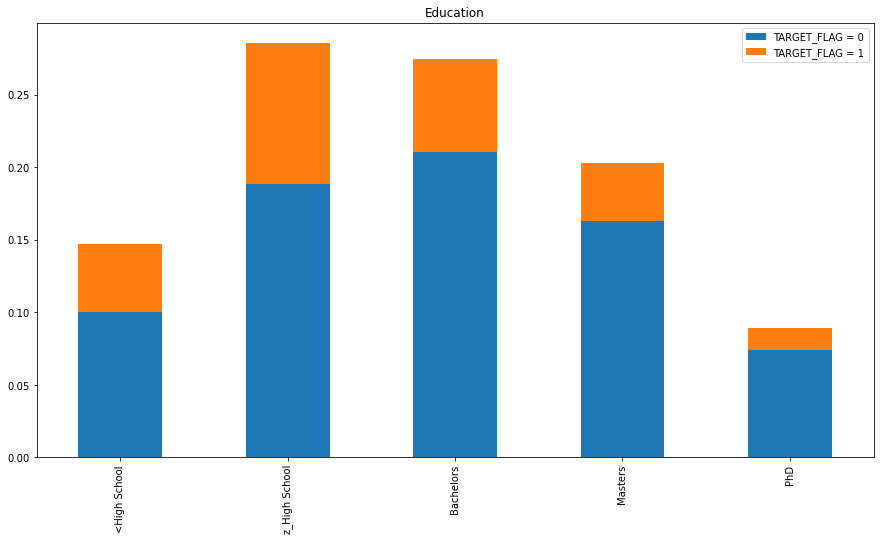

In [13]:
a0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.EDUCATION == '<High School'])/len(train_auto.EDUCATION)
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == '<High School'])/len(train_auto.EDUCATION)
b0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.EDUCATION == 'z_High School'])/len(train_auto.EDUCATION)
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'z_High School'])/len(train_auto.EDUCATION)
c0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.EDUCATION == 'Bachelors'])/len(train_auto.EDUCATION)
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'Bachelors'])/len(train_auto.EDUCATION)
d0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.EDUCATION == 'Masters'])/len(train_auto.EDUCATION)
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'Masters'])/len(train_auto.EDUCATION)
e0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.EDUCATION == 'PhD'])/len(train_auto.EDUCATION)
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'PhD'])/len(train_auto.EDUCATION)

plotdata = pd.DataFrame({
    "TARGET_FLAG = 0":[a0,b0,c0,d0,e0],
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1]},
    index=['<High School', 'z_High School', 'Bachelors', 'Masters', 'PhD'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Education")

Text(0.5, 1.0, 'Car type')

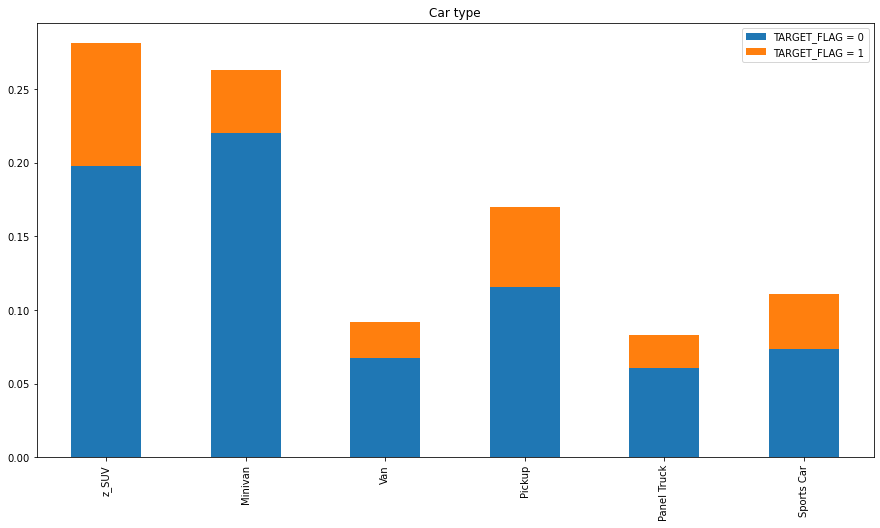

In [14]:
a0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_TYPE == 'z_SUV'])/len(train_auto.CAR_TYPE)
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'z_SUV'])/len(train_auto.CAR_TYPE)
b0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_TYPE == 'Minivan'])/len(train_auto.CAR_TYPE)
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Minivan'])/len(train_auto.CAR_TYPE)
c0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_TYPE == 'Van'])/len(train_auto.CAR_TYPE)
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Van'])/len(train_auto.CAR_TYPE)
d0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_TYPE == 'Pickup'])/len(train_auto.CAR_TYPE)
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Pickup'])/len(train_auto.CAR_TYPE)
e0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_TYPE == 'Panel Truck'])/len(train_auto.CAR_TYPE)
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Panel Truck'])/len(train_auto.CAR_TYPE)
f0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.CAR_TYPE == 'Sports Car'])/len(train_auto.CAR_TYPE)
f1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Sports Car'])/len(train_auto.CAR_TYPE)

plotdata = pd.DataFrame({
    "TARGET_FLAG = 0":[a0,b0,c0,d0,e0,f0],
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1,f1]},
    index=['z_SUV', 'Minivan', 'Van', 'Pickup', 'Panel Truck', 'Sports Car'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Car type")

Text(0.5, 1.0, 'Job')

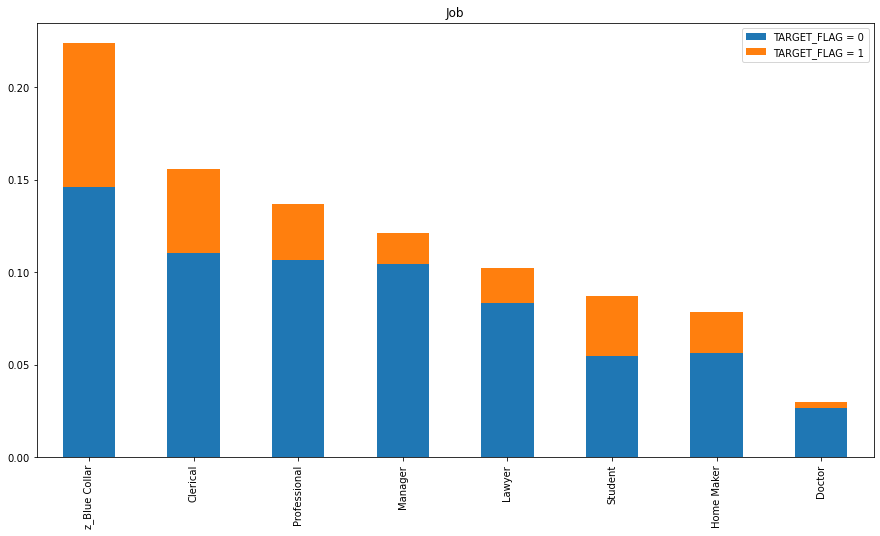

In [15]:
a0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'z_Blue Collar'])/len(train_auto.JOB)
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'z_Blue Collar'])/len(train_auto.JOB)
b0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'Clerical'])/len(train_auto.JOB)
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Clerical'])/len(train_auto.JOB)
c0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'Professional'])/len(train_auto.JOB)
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Professional'])/len(train_auto.JOB)
d0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'Manager'])/len(train_auto.JOB)
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Manager'])/len(train_auto.JOB)
e0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'Lawyer'])/len(train_auto.JOB)
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Lawyer'])/len(train_auto.JOB)
f0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'Student'])/len(train_auto.JOB)
f1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Student'])/len(train_auto.JOB)
g0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'Home Maker'])/len(train_auto.JOB)
g1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Home Maker'])/len(train_auto.JOB)
j0 = len(train_auto[train_auto.TARGET_FLAG == 0][train_auto.JOB == 'Doctor'])/len(train_auto.JOB)
j1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Doctor'])/len(train_auto.JOB)

plotdata = pd.DataFrame({
    "TARGET_FLAG = 0":[a0,b0,c0,d0,e0,f0,g0,j0],
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1,f1,g1,j1]},
    index=['z_Blue Collar', 'Clerical', 'Professional', 'Manager', 'Lawyer', 'Student', 'Home Maker', 'Doctor'])
plotdata.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title("Job")

Text(0.5, 0, 'YOJ')

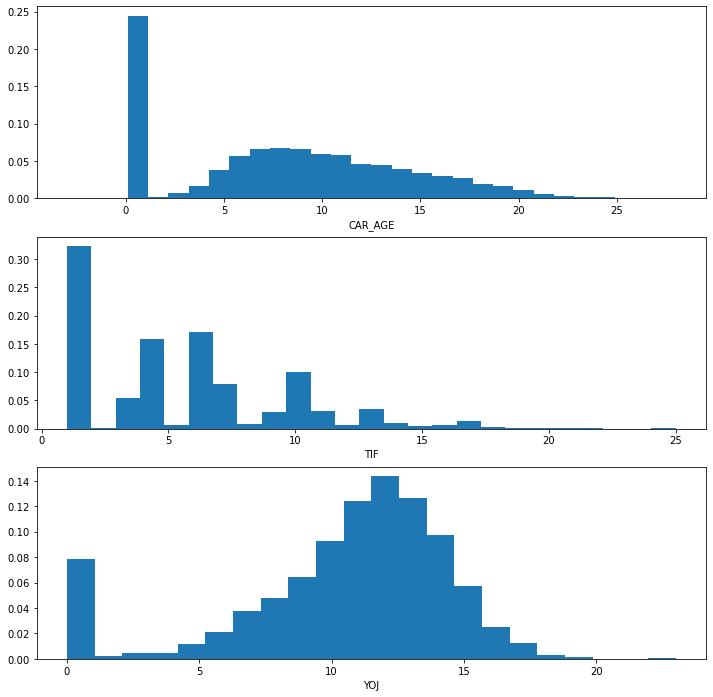

In [16]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
n, bins, patches = ax1.hist(train_auto.CAR_AGE, 30, density=True)
n, bins, patches = ax2.hist(train_auto.TIF, 25, density=True)
n, bins, patches = ax3.hist(train_auto.YOJ, 22, density=True)
ax1.set_xlabel('CAR_AGE')
ax2.set_xlabel('TIF')
ax3.set_xlabel('YOJ')

Text(0.5, 0, 'OLDCLAIM')

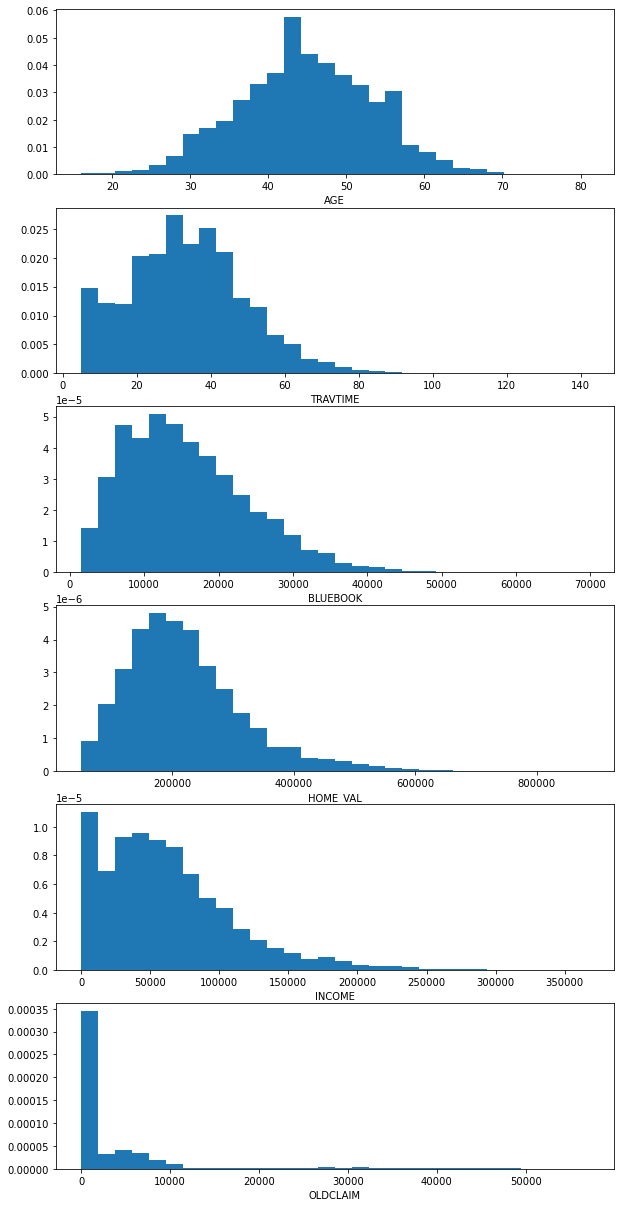

In [17]:
fig = plt.figure(figsize=(10, 25))
ax1 = fig.add_subplot(7, 1, 1)
ax2 = fig.add_subplot(7, 1, 2)
ax3 = fig.add_subplot(7, 1, 3)
ax4 = fig.add_subplot(7, 1, 4)
ax5 = fig.add_subplot(7, 1, 5)
ax6 = fig.add_subplot(7, 1, 6)
n, bins, patches = ax1.hist(train_auto.AGE, 30, density=True)
n, bins, patches = ax2.hist(train_auto.TRAVTIME, 30, density=True)
n, bins, patches = ax3.hist(train_auto.BLUEBOOK, 30, density=True)
n, bins, patches = ax4.hist(train_auto.HOME_VAL, 30, density=True)
n, bins, patches = ax5.hist(train_auto.INCOME, 30, density=True)
n, bins, patches = ax6.hist(train_auto.OLDCLAIM, 30, density=True)
ax1.set_xlabel('AGE')
ax2.set_xlabel('TRAVTIME')
ax3.set_xlabel('BLUEBOOK')
ax4.set_xlabel('HOME_VAL')
ax5.set_xlabel('INCOME')
ax6.set_xlabel('OLDCLAIM')

Text(0.5, 0, 'Variables')

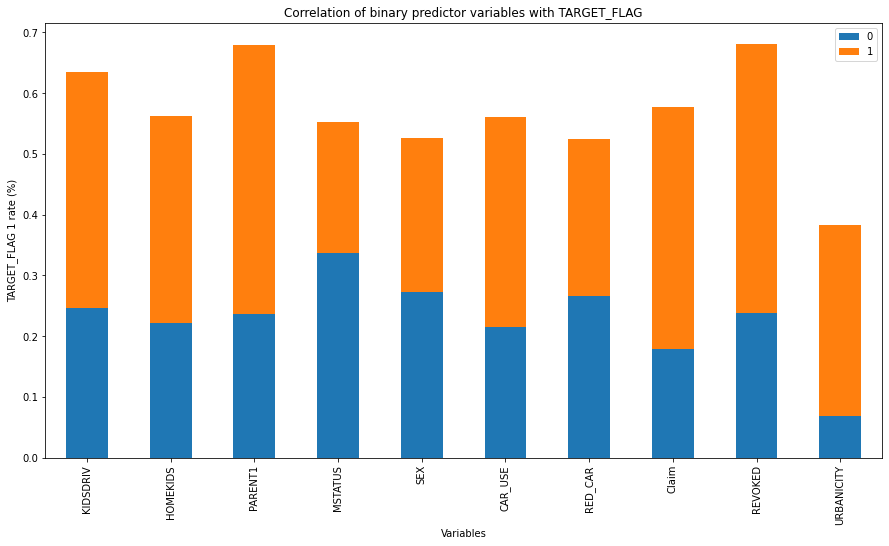

In [18]:
# Correlation of binary predictor variables with TARGET_FLAG

a0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.KIDSDRIV == 0])/len(train_auto[train_auto.KIDSDRIV == 0])
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.KIDSDRIV == 1])/len(train_auto[train_auto.KIDSDRIV == 1])
b0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.HOMEKIDS == 0])/len(train_auto[train_auto.HOMEKIDS == 0])
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.HOMEKIDS == 1])/len(train_auto[train_auto.HOMEKIDS == 1])
c0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.PARENT1 == 0])/len(train_auto[train_auto.PARENT1 == 0])
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.PARENT1 == 1])/len(train_auto[train_auto.PARENT1 == 1])
d0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.MSTATUS == 0])/len(train_auto[train_auto.MSTATUS == 0])
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.MSTATUS == 1])/len(train_auto[train_auto.MSTATUS == 1])
e0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.SEX == 0])/len(train_auto[train_auto.SEX == 0])
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.SEX == 1])/len(train_auto[train_auto.SEX == 1])
f0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_USE == 0])/len(train_auto[train_auto.CAR_USE == 0])
f1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_USE == 1])/len(train_auto[train_auto.CAR_USE == 1])
g0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.RED_CAR == 0])/len(train_auto[train_auto.RED_CAR == 0])
g1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.RED_CAR == 1])/len(train_auto[train_auto.RED_CAR == 1])
h0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CLM_FREQ == 0])/len(train_auto[train_auto.CLM_FREQ == 0])
h1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CLM_FREQ == 1])/len(train_auto[train_auto.CLM_FREQ == 1])
j0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.REVOKED == 0])/len(train_auto[train_auto.REVOKED == 0])
j1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.REVOKED == 1])/len(train_auto[train_auto.REVOKED == 1])
k0 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.URBANICITY == 0])/len(train_auto[train_auto.URBANICITY == 0])
k1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.URBANICITY == 1])/len(train_auto[train_auto.URBANICITY == 1])

plotdata = pd.DataFrame({
    "0":[a0,b0,c0,d0,e0,f0,g0,h0,j0,k0],
    "1":[a1,b1,c1,d1,e1,f1,g1,h1,j1,k1]},
    index=['KIDSDRIV', 'HOMEKIDS', 'PARENT1', 'MSTATUS', 'SEX', 'CAR_USE', 'RED_CAR', 'Claim', 'REVOKED', 'URBANICITY'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title('Correlation of binary predictor variables with TARGET_FLAG')
plt.ylabel('TARGET_FLAG 1 rate (%)')
plt.xlabel('Variables')

#### - The proportion of individuals with vs. without red cars who crash their vehicles is similar.
#### - The proportion of males vs. females who crash their vehicles is also similar.
#### - Drivers of commercial vehicles, unmarried, parents (both with kids and with kids that drive), those with previous claims, those with revoked licenses, urban drivers, all have crashes at a higher rate.

Text(0.5, 0, 'Car type')

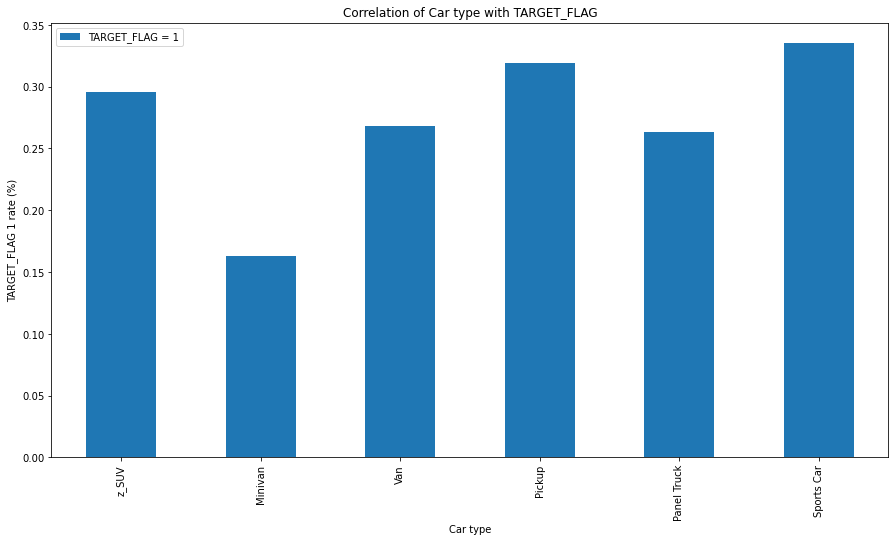

In [19]:
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'z_SUV'])/len(train_auto[train_auto.CAR_TYPE == 'z_SUV'])
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Minivan'])/len(train_auto[train_auto.CAR_TYPE == 'Minivan'])
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Van'])/len(train_auto[train_auto.CAR_TYPE == 'Van'])
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Pickup'])/len(train_auto[train_auto.CAR_TYPE == 'Pickup'])
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Panel Truck'])/len(train_auto[train_auto.CAR_TYPE == 'Panel Truck'])
f1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.CAR_TYPE == 'Sports Car'])/len(train_auto[train_auto.CAR_TYPE == 'Sports Car'])

plotdata = pd.DataFrame({
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1,f1]},
    index=['z_SUV', 'Minivan', 'Van', 'Pickup', 'Panel Truck', 'Sports Car'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Correlation of Car type with TARGET_FLAG")
plt.ylabel('TARGET_FLAG 1 rate (%)')
plt.xlabel('Car type')

Text(0.5, 0, 'Education type')

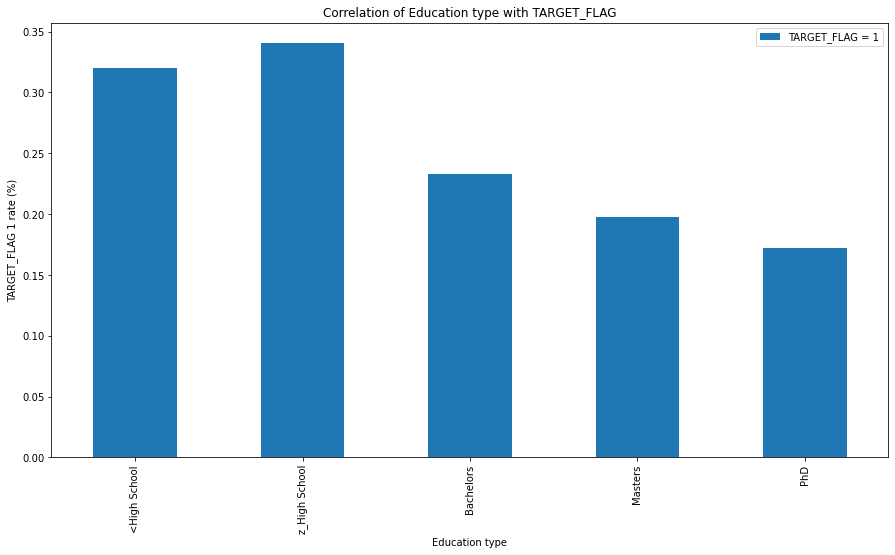

In [20]:
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == '<High School'])/len(train_auto[train_auto.EDUCATION == '<High School'])
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'z_High School'])/len(train_auto[train_auto.EDUCATION == 'z_High School'])
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'Bachelors'])/len(train_auto[train_auto.EDUCATION == 'Bachelors'])
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'Masters'])/len(train_auto[train_auto.EDUCATION == 'Masters'])
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.EDUCATION == 'PhD'])/len(train_auto[train_auto.EDUCATION == 'PhD'])

plotdata = pd.DataFrame({
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1]},
    index=['<High School', 'z_High School', 'Bachelors', 'Masters', 'PhD'])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Correlation of Education type with TARGET_FLAG")
plt.ylabel('TARGET_FLAG 1 rate (%)')
plt.xlabel('Education type')

Text(0.5, 0, 'Job type')

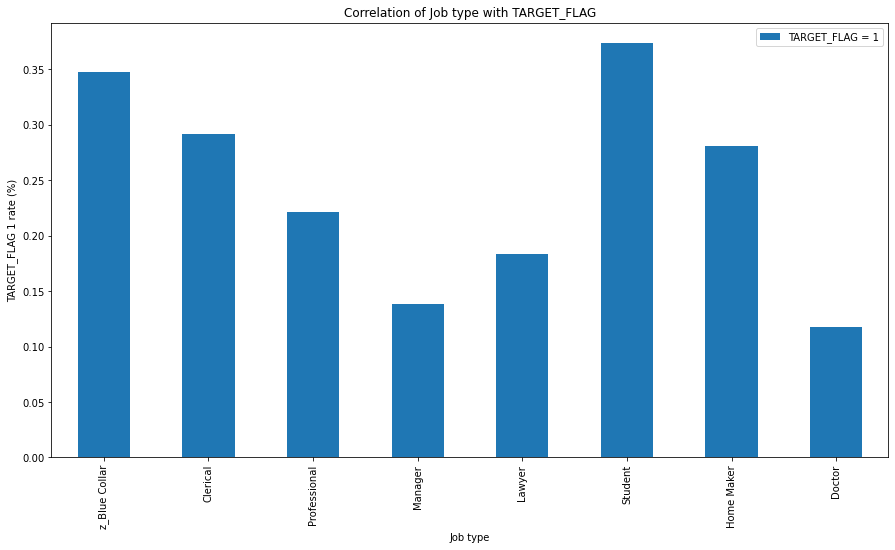

In [21]:
a1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'z_Blue Collar'])/len(train_auto[train_auto.JOB == 'z_Blue Collar'])
b1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Clerical'])/len(train_auto[train_auto.JOB == 'Clerical'])
c1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Professional'])/len(train_auto[train_auto.JOB == 'Professional'])
d1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Manager'])/len(train_auto[train_auto.JOB == 'Manager'])
e1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Lawyer'])/len(train_auto[train_auto.JOB == 'Lawyer'])
f1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Student'])/len(train_auto[train_auto.JOB == 'Student'])
g1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Home Maker'])/len(train_auto[train_auto.JOB == 'Home Maker'])
j1 = len(train_auto[train_auto.TARGET_FLAG == 1][train_auto.JOB == 'Doctor'])/len(train_auto[train_auto.JOB == 'Doctor'])

plotdata = pd.DataFrame({
    "TARGET_FLAG = 1":[a1,b1,c1,d1,e1,f1,g1,j1]},
    index=['z_Blue Collar', 'Clerical', 'Professional', 'Manager', 'Lawyer', 'Student', 'Home Maker', 'Doctor'])
plotdata.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title("Correlation of Job type with TARGET_FLAG")
plt.ylabel('TARGET_FLAG 1 rate (%)')
plt.xlabel('Job type')

#### - The crash rate is significantly lower among those with at least a Bachelors degree.
#### - Minivan drivers are also significantly safer than drivers of other types of cars.
#### - Students and blue collar workers are less safe than individuals with other types of jobs.

In [22]:
# Adding binary variables for “College_education”, “Minivan”, “Student”, and “Blue_collar”. 
# For example, whether or not an individual has at least a college education, whether or not they drive a minivan, 
# and whether or not they area student or blue collar worker.
# train_auto
train_auto['JOB'] = train_auto['JOB'].replace('Student',1)
train_auto['JOB'] = train_auto['JOB'].replace('z_Blue Collar',1)
train_auto['JOB'] = train_auto['JOB'].replace('Clerical',0)
train_auto['JOB'] = train_auto['JOB'].replace('Professional',0)
train_auto['JOB'] = train_auto['JOB'].replace('Manager',0)
train_auto['JOB'] = train_auto['JOB'].replace('Home Maker',0)
train_auto['JOB'] = train_auto['JOB'].replace('Doctor',0)
train_auto['JOB'] = train_auto['JOB'].replace('Lawyer',0)
train_auto['CAR_TYPE'] = train_auto['CAR_TYPE'].replace('Minivan',0)
train_auto['CAR_TYPE'] = train_auto['CAR_TYPE'].replace('z_SUV',1)
train_auto['CAR_TYPE'] = train_auto['CAR_TYPE'].replace('Van',1)
train_auto['CAR_TYPE'] = train_auto['CAR_TYPE'].replace('Pickup',1)
train_auto['CAR_TYPE'] = train_auto['CAR_TYPE'].replace('Panel Truck',1)
train_auto['CAR_TYPE'] = train_auto['CAR_TYPE'].replace('Sports Car',1)
train_auto['EDUCATION'] = train_auto['EDUCATION'].replace('<High School',1)
train_auto['EDUCATION'] = train_auto['EDUCATION'].replace('z_High School',1)
train_auto['EDUCATION'] = train_auto['EDUCATION'].replace('Bachelors',0)
train_auto['EDUCATION'] = train_auto['EDUCATION'].replace('Masters',0)
train_auto['EDUCATION'] = train_auto['EDUCATION'].replace('PhD',0)

In [23]:
# Adding binary variables for “College_education”, “Minivan”, “Student”, and “Blue_collar”. 
# For example, whether or not an individual has at least a college education, whether or not they drive a minivan, 
# and whether or not they area student or blue collar worker.
# test_auto
test_auto['JOB'] = test_auto['JOB'].replace('Student',1)
test_auto['JOB'] = test_auto['JOB'].replace('z_Blue Collar',1)
test_auto['JOB'] = test_auto['JOB'].replace('Clerical',0)
test_auto['JOB'] = test_auto['JOB'].replace('Professional',0)
test_auto['JOB'] = test_auto['JOB'].replace('Manager',0)
test_auto['JOB'] = test_auto['JOB'].replace('Home Maker',0)
test_auto['JOB'] = test_auto['JOB'].replace('Doctor',0)
test_auto['JOB'] = test_auto['JOB'].replace('Lawyer',0)
test_auto['CAR_TYPE'] = test_auto['CAR_TYPE'].replace('Minivan',0)
test_auto['CAR_TYPE'] = test_auto['CAR_TYPE'].replace('z_SUV',1)
test_auto['CAR_TYPE'] = test_auto['CAR_TYPE'].replace('Van',1)
test_auto['CAR_TYPE'] = test_auto['CAR_TYPE'].replace('Pickup',1)
test_auto['CAR_TYPE'] = test_auto['CAR_TYPE'].replace('Panel Truck',1)
test_auto['CAR_TYPE'] = test_auto['CAR_TYPE'].replace('Sports Car',1)
test_auto['EDUCATION'] = test_auto['EDUCATION'].replace('<High School',1)
test_auto['EDUCATION'] = test_auto['EDUCATION'].replace('z_High School',1)
test_auto['EDUCATION'] = test_auto['EDUCATION'].replace('Bachelors',0)
test_auto['EDUCATION'] = test_auto['EDUCATION'].replace('Masters',0)
test_auto['EDUCATION'] = test_auto['EDUCATION'].replace('PhD',0)

### - Unfortunately due to time limitation, I skip the correlation of MVR_PTS, CAR_AGE, INCOME, BLUEBOOK,  TRAVTIME, and TIF with TARGET_FLAG in this occassion, and I will continue with the rest of the excercise.


## Correlation within the binary predictor variables for TARGET_FLAG

In [24]:
#Creating Metadata DataFrame so that it will be easy to handle and manipulate data during data exploration steps
#role: input, target
#level: nominal, interval, ordinal, binary
#keep: True or False
#dtype: int, float, str
MetaData = pd.DataFrame(columns=['variable','role', 'level', 'keep', 'dtype'])
data =[]
for columns in train_auto.columns:
    #Defining Role
    if columns == 'TARGET_FLAG':
        role = 'TARGET_FLAG'
    else:
        role = 'input'
    #Defining DataTypes
    dtype = train_auto[columns].dtype
    #Defining keep
    keep = True
    #Defining Level
    if columns == 'URBANICITY' or columns == 'Claim' or columns == 'CAR_USE' or columns == 'PARENT1' or columns == 'TARGET_FLAG' or columns == 'MSTATUS' or columns == 'SEX' or columns == 'HOMEKIDS' or columns == 'RED_CAR' or columns == 'CAR_TYPE' or columns == 'KIDSDRIV' or columns == 'JOB' or columns == 'EDUCATION' or columns == 'REVOKED':
        level = 'binary'
    elif train_auto[columns].dtype == float:
        level = 'interval'
    elif train_auto[columns].dtype == int:
        level = 'ordinal'  
    f_dict = {'variable' : columns,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype}
    data.append(f_dict)
MetaData = MetaData.append(data)
print(MetaData)

       variable         role     level  keep    dtype
0   TARGET_FLAG  TARGET_FLAG    binary  True    int64
1      KIDSDRIV        input    binary  True    int64
2           AGE        input  interval  True  float64
3      HOMEKIDS        input    binary  True    int64
4           YOJ        input  interval  True  float64
5        INCOME        input  interval  True  float64
6       PARENT1        input    binary  True    int64
7      HOME_VAL        input  interval  True  float64
8       MSTATUS        input    binary  True    int64
9           SEX        input    binary  True    int64
10    EDUCATION        input    binary  True    int64
11          JOB        input    binary  True  float64
12     TRAVTIME        input    binary  True    int64
13      CAR_USE        input    binary  True    int64
14     BLUEBOOK        input  interval  True  float64
15          TIF        input  interval  True    int64
16     CAR_TYPE        input    binary  True    int64
17      RED_CAR        input

In [25]:
#Creating list of variables based on the levels 
for variable in MetaData.variable:
    IntervalVar = MetaData[MetaData.level=='interval']['variable']
    CategoricalVar = MetaData[MetaData.level=='categorical']['variable']
    BinaryVar = MetaData[MetaData.level=='binary']['variable']
    OrdinalVar = MetaData[MetaData.level=='ordinal']['variable']

<AxesSubplot:>

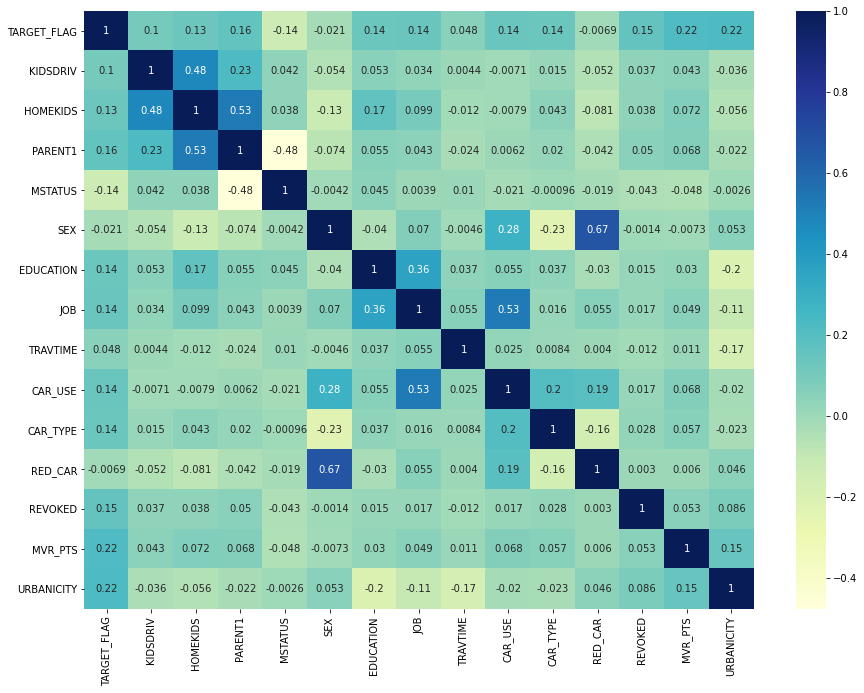

In [26]:
#Correlation Heatmap of the binary interval variables
fig, ax = plt.subplots(figsize=(15,11))
sns.heatmap(train_auto[BinaryVar].corr(), annot=True, cmap="YlGnBu")

### - Based on the above, correlations exist between “MSTATUS” and “PARENT1”, between “PARENT1” and “HOMEKIDS”, between “HOMEKIDS” and “KIDSDRIV”, between “RED_CAR” and “SEX”, and betweem "CAR_USE" and "JOB".

In [27]:
# Droping non used variables
train_auto = train_auto.drop(columns=['TRAVTIME','MVR_PTS','RED_CAR','BLUEBOOK','TIF','HOME_VAL','YOJ','OLDCLAIM','AGE','CAR_AGE','JOB','SEX','INCOME','HOMEKIDS','PARENT1'])
test_auto = test_auto.drop(columns=['TRAVTIME','MVR_PTS','RED_CAR','BLUEBOOK','TIF','HOME_VAL','YOJ','OLDCLAIM','AGE','CAR_AGE','JOB','SEX','INCOME','HOMEKIDS','PARENT1'])

## Data modeling
### Binary logistic regression

In [28]:
trainLabel = np.asarray(train_auto['TARGET_FLAG'])
trainData = np.asarray(train_auto.drop('TARGET_FLAG',1))
testLabel = np.asarray(test_auto['TARGET_FLAG'])
testData = np.asarray(test_auto.drop('TARGET_FLAG',1))

In [29]:
#logistic_Regression
lr = LogisticRegression(solver='liblinear', C=0.1, multi_class='ovr',random_state=0) 
lr.fit(trainData, trainLabel)
prediction = lr.predict(testData)
prediction = pd.DataFrame(prediction)
prediction.to_csv('prediction.csv')

In [30]:
print('The score is: ', lr.score(trainData, trainLabel))

The score is:  0.7631417718416861


In [31]:
confusion_matrix(trainLabel, lr.predict(trainData))

array([[5660,  348],
       [1585,  568]], dtype=int64)

#### The obtained matrix shows the following:
#### 5660 true negative predictions.
#### 1585 false negative predictions.
#### 348 false positive prediction.
#### 568 true positive predictions.

In [32]:
print(classification_report(trainLabel, lr.predict(trainData)))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      6008
           1       0.62      0.26      0.37      2153

    accuracy                           0.76      8161
   macro avg       0.70      0.60      0.61      8161
weighted avg       0.74      0.76      0.73      8161



## These results could be further improved by modifing the logistic regression model (removing/adding different variables), and also by running different models such as random forest and K-nearest neighbor. 